In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk4 import rk_error_control_perfect_first_step

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    (res, sol, first_deriv, error_samplings, ratios, monitor) = rk_error_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, error_samplings) = rk_error_control_static_alpha_beta(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    # for this_x in xs:
    #     plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    # plt.plot(t_eval, computed_solutions, label="computed solution")

    actual_solutions = solution(t_eval)
    # plt.plot(t_eval, actual_solutions, label="actual solution")

    # # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    # plt.title(f"actual solution vs interpolated solution tol={tol}")
    # plt.xlabel("t")
    # plt.ylabel('y')
    # plt.legend(loc="upper right")
    # plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [abs(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    # for this_x in xs:
    #     plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    # plt.title(f"global error for tol={tol}")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    
    plt.figure()
    end_of_steps = [r[0] for r in ratios]
    ratios_at_end_of_steps = [r[1] for r in ratios]
    plt.plot(end_of_steps, ratios_at_end_of_steps)
    plt.axhline(y=1, color="red")
    plt.xlabel("t")
    plt.ylabel("ratio")
    # plt.title(f"error_estimate/exact_error at end of steps for tol={tol}")
    plt.show()

    # # shape of errors - graphs
    # plt.figure()
    # for (x_i, x_i_plus_1, hb) in error_samplings:
    #     num_points = 100
    #     pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
    #     errors = []
    #     for i, pt in enumerate(pts_to_sample):
    #         y = solution([pt])[0]
    #         hb_eval = hb.eval(pt)
    #         error = abs(hb_eval - y)
    #         errors.append( error )

    #         # # print the error at the extremities
    #         # if i == 0:
    #         #     interpolation_error = hb_eval - hb.y_i
    #         #     print("error=", error, "interpolation_error=", interpolation_error)

    #         # if i == len(pts_to_sample) - 1:
    #         #     interpolation_error = hb_eval - hb.y_i_plus_1
    #         #     print("error=", error, "interpolation_error=", interpolation_error)

    #     maximum_error = max(errors)
    #     scaled_errors = [error / (maximum_error) for error in errors]

    #     # str_x_i = "{:.3f}".format(x_i)
    #     # str_x_i_plus_1 = "{:.3f}".format(x_i_plus_1)
    #     x_axis = [i/(num_points - 1) for i in range(num_points)]
    #     plt.plot(x_axis, scaled_errors, label=f"x_{str(x_i)}_{str(x_i_plus_1)}")
    # plt.title("plot of shape of errors")
    # plt.xlabel("step scaled between 0 and 1")
    # plt.ylabel('scaled error')
    # # plt.legend()
    # plt.show()

    # # ====================================== figure of satisfying global defect
    # actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    # hb_prime_evals = [first_deriv(x) for x in t_eval]
    # plt.figure()
    # plt.plot(t_eval, actual_f_evals)
    # plt.plot(t_eval, hb_prime_evals)
    # plt.title(f"first derivative for tol={tol}")
    # plt.show()

    # defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    # plt.figure()
    # plt.plot(t_eval, defects)
    # plt.title(f"global defect for tol={tol}")
    # plt.show()
    
    # # ====================================== end figure of satisfying global defect

    # # ====================================== figure of defect shape

    # minimum_step_size = 0.01
    # defects_small_steps = []
    # plt.figure()
    # for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
    #     num_points = 100
    #     pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
    #     defects = []
    #     for pt in pts_to_sample:
    #         y = solution([pt])[0]
    #         f_eval  = model(pt, y)[0]
    #         hb_prime_eval = hb.prime(pt)
    #         defects.append( abs(hb_prime_eval - f_eval) )
    #     maximum_defect = max(defects)
    #     # minimum_defect = min(defects)
    #     # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
    #     plot_vals = [ defect/ maximum_defect for defect in defects]
    #     #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    #     x_axis = [i/(num_points - 1) for i in range(num_points)]

    #     if (x_i_plus_1 - x_i < minimum_step_size):
    #         defects_small_steps.append([x_axis, plot_vals])
    #         continue
    #     plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    # plt.title("plot of defects")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # # plt.legend()
    # plt.show()
    # # ====================================== end figure of defect

    # # ====================================== defects on small steps
    # plt.figure()
    # for [x_axis, plot_vals] in defects_small_steps:
    #     plt.plot(x_axis, plot_vals)
    # plt.title("plot of defects on small step sizes")
    # plt.xlabel("x_i to x_i_plus_1")
    # plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.show()
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001]
beta values [1.0, 2.0, 2.0000000000000004, 1.9999999999999996]
n_steps 16
n_successful_steps 15


Monitor6
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001]
beta values []
n_steps 0
n_successful_steps 0

integration complete


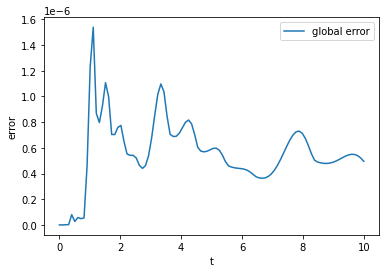

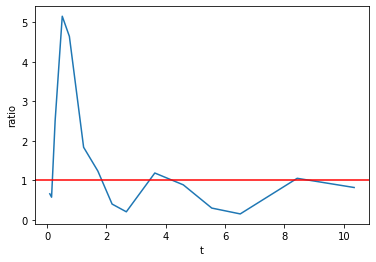

0.0
0.0
0.0
2.687983169380459e-11
5.882181408622955e-10
7.399042489808494e-09
2.53445781028816e-08
1.2866167464764544e-08
8.100725662485431e-07
7.066843807912448e-07
5.592270568843816e-07
4.461959648427438e-07
7.068684296784866e-07
5.820116494859029e-07
4.597182994281468e-07
3.692797818644067e-07
4.934643553222706e-07
4.0221721564481783e-07


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 2.0, 0.4999999999999999, 1.0000000000000002, 1.0000000000000009, 0.9999999999999981, 0.5000000000000004, 2.0000000000000018, 0.49999999999999956, 0.49999999999999906]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.9999999999999996, 0.5, 0.9999999999999991, 2.0000000000000018, 1.0000000000000018, 1.9999999999999982, 0.49999999999999956, 2.0000000000000036]
n_steps 40
n_successful_steps 30


Monitor6
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 1.0000000000000002, 1.0000000000000004, 2.0, 1.0000000000000009, 0.49999999999999956, 0.9999999999999981, 0.5000000000000004, 2.0000000000000018, 0.49999999999999906]
beta values []
n_steps 0
n_successful_steps 0

integration complete


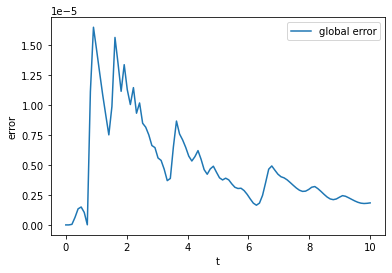

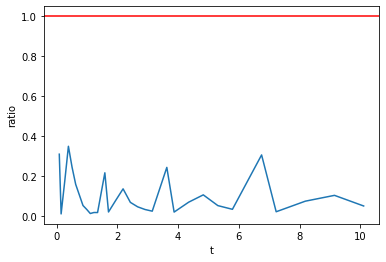

0.0
0.0
0.0
2.96594748760981e-10
1.5080521498234134e-08
7.657196535726385e-07
1.3908223965852784e-06
1.4984037676191164e-06
1.0460340186257966e-06
1.8353916723889974e-05
1.525421793779902e-05
1.2737633511117341e-05
1.0667829371702187e-05
8.9518719396664e-06
1.6566359215874904e-05
1.3615467518046653e-05
1.3793106649812037e-05
1.2149025035435024e-05
1.011061601324803e-05
8.211607795377551e-06
6.608178458974989e-06
5.310237952846353e-06
8.716093140723191e-06
6.957422222717002e-06
6.1657573279805256e-06
4.969203185295479e-06
3.8874301520192e-06
3.0208165360465222e-06
4.967317205124833e-06
3.845956609065115e-06
3.1874109953072133e-06
2.433465345235905e-06
1.822941980882467e-06


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 0.9999999999999998, 1.0000000000000002, 1.0000000000000009]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 1.0000000000000002, 0.9999999999999991, 1.0000000000000018]
n_steps 15
n_successful_steps 15


Monitor6
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 0.9999999999999998, 1.0000000000000002, 1.0000000000000009, 0.9999999999999981]
beta values []
n_steps 0
n_successful_steps 0

integration complete


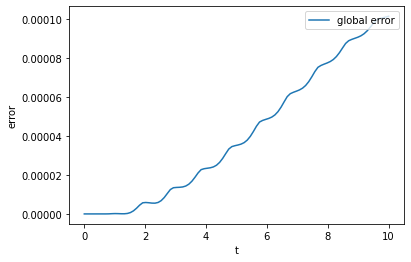

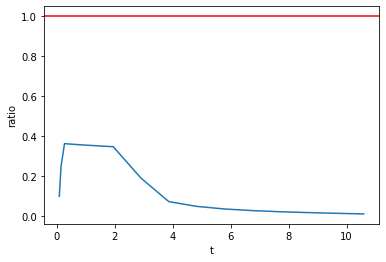

0.0
0.0
0.0
1.4699352846037073e-13
4.8692161414010116e-12
1.5752510407196496e-10
5.1397053280055616e-09
1.7064223101215248e-07
5.827875876329713e-06
1.3374843749414111e-05
2.292349582289077e-05
3.4395108886808856e-05
4.745387200744133e-05
6.147176797277609e-05
7.555128114411502e-05
8.862304154710898e-05
9.961413514325557e-05
0.00010765548247526624


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 2.0, 0.9999999999999991, 1.0000000000000073, 0.9999999999999852, 0.5000000000000074, 1.9999999999999705, 1.0000000000000295, 0.4999999999999852, 2.000000000000059, 0.5000000000000296, 1.9999999999998817, 0.9999999999999408]
beta values [0.5, 1.0, 2.0, 1.9999999999999996, 1.0000000000000004, 1.0000000000000009, 1.9999999999999982, 0.9999999999999926, 1.0000000000000149, 1.9999999999999705, 2.0000000000000147, 0.9999999999999704, 2.000000000000059, 0.5000000000000296, 0.4999999999999852, 1.0000000000000593, 1.9999999999998817, 0.5000000000000074]
n_steps 763
n_successful_steps 649


Monitor6
alpha values [0.5, 1.0, 2.0, 0.9999999999999996, 0.5000000000000001, 0.9999999999999991, 0.5000000000000004, 1.0000000000000073, 0.9999999999999852, 0.5000000000000074, 1.9999999999999705, 2.000000000000059, 0.5000000000000296, 0.4999999999999963, 1.0000000000000295, 0.4999999999999852, 1.9999999999998817, 0.9999999999999408]
beta values []
n_steps 0


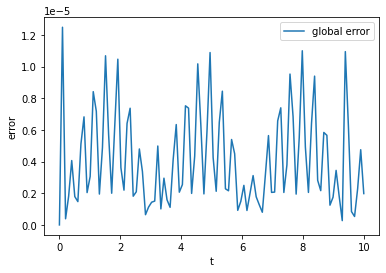

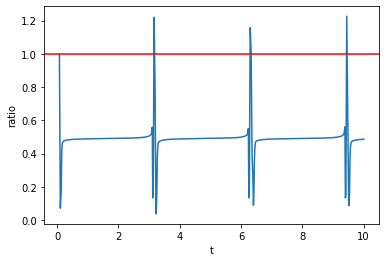

0.0
0.0
0.0
8.054757961173387e-07
1.0108182359497286e-05
3.5463102711491556e-06
1.8807569338863406e-06
1.5454753418131517e-06
1.571842449449301e-06
1.696423055475016e-06
1.8474810542790099e-06
2.0054469341279635e-06
2.1649595078609973e-06
2.324530246844425e-06
2.483726843888201e-06
2.6424052675388943e-06
2.800500266242345e-06
2.9579681980473893e-06
3.1147714286694494e-06
3.2708740753117915e-06
3.426240851034379e-06
3.5808367538914254e-06
3.7346269882165828e-06
3.887576948580218e-06
4.039652220788614e-06
4.190818588378775e-06
4.341042039668341e-06
4.490288774638973e-06
4.638525213485067e-06
4.785718003941231e-06
4.931834028054638e-06
5.0768404102896625e-06
5.220704524744324e-06
5.363394002699806e-06
5.504876739781395e-06
5.645120902508793e-06
5.784094937122397e-06
5.921767574745829e-06
6.05810783960159e-06
6.193085055672398e-06
6.326668853806616e-06
6.458829178268566e-06
6.589536293288845e-06
6.71876079050282e-06
6.846473594834812e-06
6.972645971492497e-06
7.09724953229518e-06
7.2202562

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.9999999999999996, 1.9999999999999991, 0.5000000000000004, 2.0000000000000018, 0.9999999999999981, 2.0, 0.5000000000000009, 2.0000000000000147, 1.9999999999999705, 2.000000000000059, 1.0000000000000073, 0.5000000000000074, 1.9999999999998817, 0.4999999999999852, 1.0000000000000295, 0.5000000000000296, 0.4999999999999963]
beta values [0.9999999999999996, 1.0, 2.0, 1.0000000000000004, 0.5000000000000002, 1.9999999999999982, 0.49999999999999956, 1.0000000000000018, 0.5, 1.9999999999999962, 2.0000000000000147, 2.000000000000059, 0.5000000000000074, 0.9999999999999704, 1.9999999999999705, 1.9999999999998817, 0.4999999999999852, 0.5000000000000296, 0.9999999999999926, 0.4999999999999963]
n_steps 333
n_successful_steps 248


Monitor6
alpha values [0.5, 1.0, 0.9999999999999996, 1.0000000000000004, 1.9999999999999991, 0.5000000000000004, 2.0000000000000018, 0.9999999999999981, 2.0, 0.5000000000000009, 2.0000000000000147, 2.000000000000059, 1.00

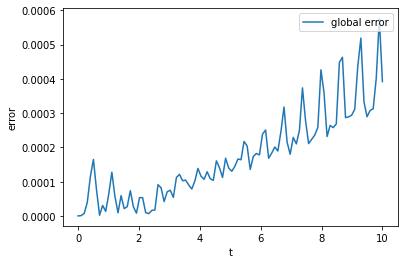

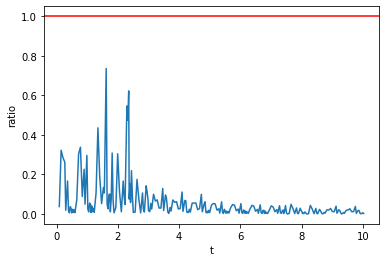

0.0
0.0
0.0
1.2671036988542994e-06
2.1596900040332656e-05
9.00019457183987e-06
3.4127485454060746e-05
3.893503967855594e-05
8.925983919194636e-05
0.00010529798365288556
0.00012873626727638587
0.0001653689804448355
0.00017937560219882798
0.0001725109250620971
0.0001237369467841365
0.00011350751889560584
9.275074390746596e-05
7.906011845837391e-05
2.3412601260819343e-05
2.2503114035732352e-05
4.101694739766515e-05
2.813100682752534e-05
1.3360751599744702e-05
1.6260267527989924e-05
5.88115747948148e-05
6.963177393437547e-05
8.703092783357569e-05
0.00011826490372324194
0.0001277215567245804
0.00012217579383588806
8.041850378770476e-05
7.365499240608031e-05
5.938724032672482e-05
5.038865294326733e-05
7.457818362865964e-09
4.269982053806132e-05
5.952430289513089e-05
4.640777958675457e-05
6.566524210604996e-06
5.5562693304089805e-06
2.9253043745569585e-05
3.495436959832787e-05
4.658215559394385e-05
7.287853951809531e-05
7.83618314186274e-05
7.438144165705651e-05
3.969915704526983e-05
2.688083

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 0.5000000000000002, 0.9999999999999996, 0.4999999999999998]
beta values [0.9999999999999996, 1.0, 2.0, 2.0000000000000004, 1.9999999999999991, 1.9999999999999996, 1.0000000000000004, 2.000000000000001]
n_steps 18
n_successful_steps 17


Monitor6
alpha values [0.5, 1.0, 0.4999999999999999, 0.5000000000000001, 0.5000000000000002, 0.9999999999999996, 0.4999999999999998, 1.0000000000000004]
beta values []
n_steps 0
n_successful_steps 0

integration complete


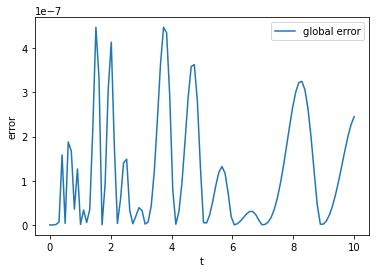

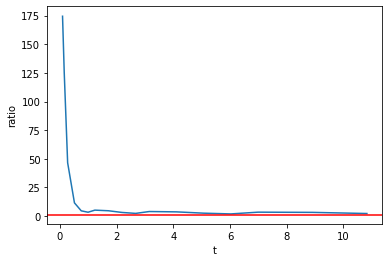

0.0
0.0
0.0
0.0
1.1102230246251565e-16
0.0
1.1102230246251565e-16
0.0
0.0
5.551115123125783e-17
0.0
0.0
0.0
5.551115123125783e-17
0.0
0.0
0.0
0.0
0.0
1.3877787807814457e-17


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 2.0, 0.4999999999999999, 0.5000000000000001, 2.0000000000000018, 0.49999999999999956, 0.9999999999999991]
beta values [0.5, 1.0, 2.0, 2.0000000000000004, 1.9999999999999996, 0.49999999999999956, 2.0000000000000018, 1.0000000000000009]
n_steps 29
n_successful_steps 26


Monitor6
alpha values [0.5, 1.0, 2.0, 0.4999999999999999, 0.5000000000000001, 2.0000000000000018, 0.49999999999999956, 0.9999999999999991]
beta values []
n_steps 0
n_successful_steps 0

integration complete


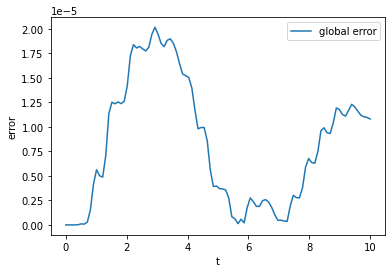

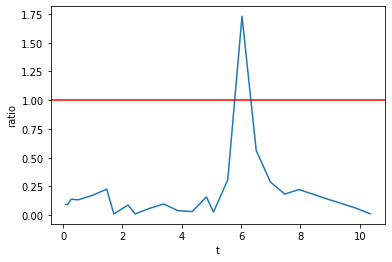

0.0
0.0
0.0
7.893685705084863e-13
3.7754244175403073e-11
1.948597949663622e-09
1.0635209479747942e-07
5.660225678549846e-06
1.2612022487326624e-05
1.254488208081439e-05
1.8471667059372088e-05
1.819023213922577e-05
2.0203662323692306e-05
1.907147216795302e-05
1.5260713449372076e-05
9.781733401437176e-06
3.9184298200600765e-06
3.665118959855773e-06
6.247266802206219e-07
2.7864280778278072e-06
2.619333170139626e-06
4.4442303631653246e-07
3.013121744166458e-06
6.818572658953692e-06
1.0050095201746823e-05
1.1998030458537645e-05
1.229976948469158e-05
1.0986765136278276e-05
8.441493192012928e-06


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
Monitor8
alpha values [0.5, 1.0, 0.4999999999999999, 1.0000000000000002, 1.0000000000000009, 0.9999999999999981, 0.5000000000000004, 2.0000000000000018, 0.49999999999999956, 0.9999999999999991]
beta values [0.9999999999999998, 1.0, 2.0, 2.0000000000000004, 0.9999999999999991, 2.0000000000000018, 1.0000000000000018, 1.9999999999999982, 0.49999999999999956, 1.0000000000000009]
n_steps 34
n_successful_steps 30


Monitor6
alpha values [0.5, 1.0, 0.4999999999999999, 1.0000000000000002, 1.0000000000000009, 0.49999999999999956, 0.9999999999999981, 0.5000000000000004, 2.0000000000000018, 0.9999999999999991]
beta values []
n_steps 0
n_successful_steps 0

integration complete


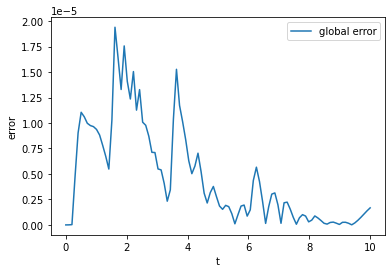

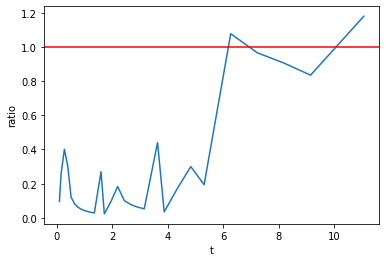

0.0
0.0
0.0
7.112826105881709e-09
2.1855364085165974e-07
6.078959434274722e-06
9.428558032098522e-06
1.1072003378909123e-05
1.158488086888676e-05
1.1374826653975934e-05
1.0726993671994478e-05
9.837761707154336e-06
8.83963829861889e-06
7.81957500101127e-06
6.832375270771074e-06
2.0732104545784225e-05
1.66401734609245e-05
1.8332805357013093e-05
1.631824560632822e-05
1.3176395152747489e-05
1.0059133665807352e-05
7.4040761206539685e-06
5.311699690757621e-06
1.5471131863620258e-05
9.748974105328045e-06
6.966076039338631e-06
3.9241384879318275e-06
1.991115035959723e-06
5.598301862530519e-06
2.4645798202271862e-06
8.705551501897446e-07
2.8538044549719643e-07
1.2441454950717912e-06


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

# t_span_8 = [0, 10]
# eps = 0.1
# a = exp(-1/eps)
# y0_8 = [1, a/(eps*(-1+a))]

# def model8(t, y):
#     return [y[1], y[0]/eps]

# def solution8(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [(1-exp(x/eps)*a)/(1-a) for x in t]

# experiment(model8, y0_8, t_span_8, solution8)

# ## the results were extremely bad. So i wanted to see the solution
# plt.figure()
# plt.plot(t_span_8, solution8(t_span_8))



In [13]:
# Jeff cash test set second one
# t_span_9 = [0, 10]
# eps = 0.1
# y0_9 = [1, -1/sqrt(eps)]

# def model9(t, y):
#     return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

# def solution9(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     return [exp(-x/sqrt(eps)) for x in t]

# experiment(model9, y0_9, t_span_9, solution9)

In [14]:
# # Wolfram Alpha first problem

# t_span_10 = [0, 10]
# y0_10 = [1, 2]

# def model10(t, y):
#     return [y[1], -3*y[0] + 2*cos(4*t)]

# def solution10(t):
#     # THE experiment method calculates error on "computed[0]"
#     # so we can only verify the error of y[0] there
#     s = sqrt(3)
#     return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

# experiment(model10, y0_10, t_span_10, solution10)